# 階層クラスタリング
クラスタリングの代表的なアルゴリズム

In [16]:
# データの準備
import seaborn as sns
import pandas as pd
df = sns.load_dataset("iris")
# 正解ラベル(目的変数)である species カラムがないとして、教師なしクラスタリングを行う。
X = df.drop(columns=["species"])
X.head()
# 標準化
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

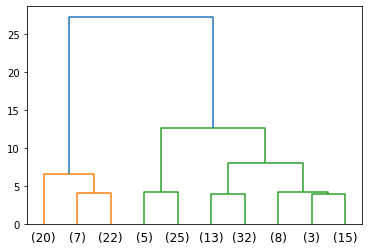

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

"""
dendrogramを構成する情報を i番目のクラスタ結合に関する情報が格納された Numpy Array で返す。このデータに従ってdendrogramが構成されていくということ 。
i番目に結合に関する情報: [クラスタ1のindex, クラスタ2のindex, 距離, クラスタに含まれるデータの数]
"""
Z = linkage(X_scaled, method="ward")

# dendrogramの描画
# tranceteをうまく指定してdendrogramを切り抜く。
# クラスタ数が 10 になるようにdendrogramを切りにく()
d = dendrogram(Z, truncate_mode="lastp", p=10)

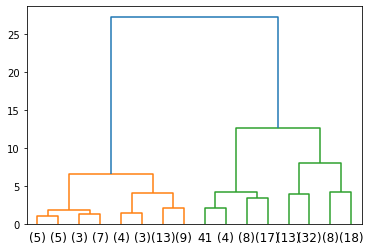

In [13]:
# 高さが 3 になるようにdendrogramを切り抜く(truncate_mode="level")
d = dendrogram(Z, truncate_mode="level", p=3)

### クラスタ分布の描画

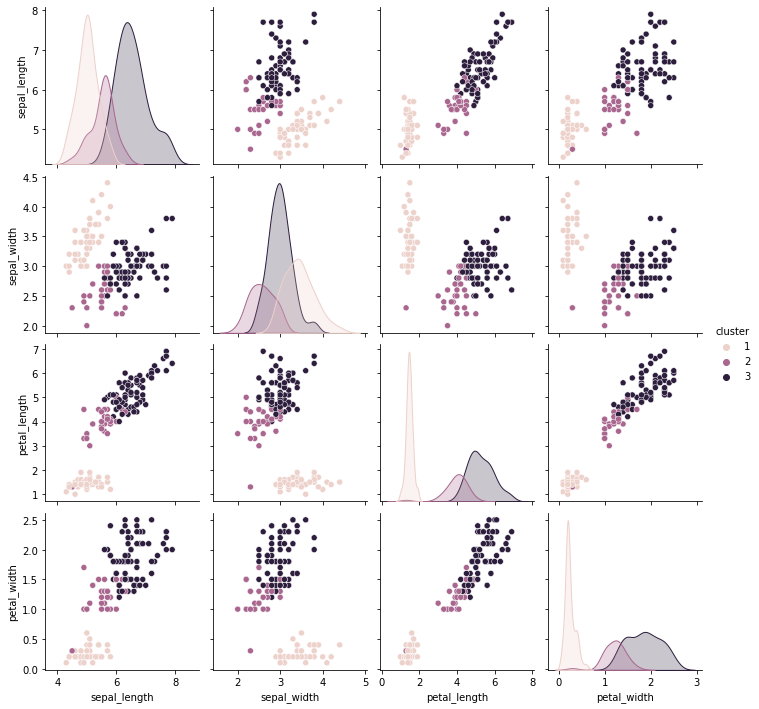

In [18]:
# fclusterを結果を使って3つのグループに分ける
clusters = fcluster(Z, criterion="maxclust", t=3)
hc_result_df = pd.concat([X, pd.DataFrame({"cluster": clusters})], axis=1)
sns.pairplot(hc_result_df, hue="cluster")

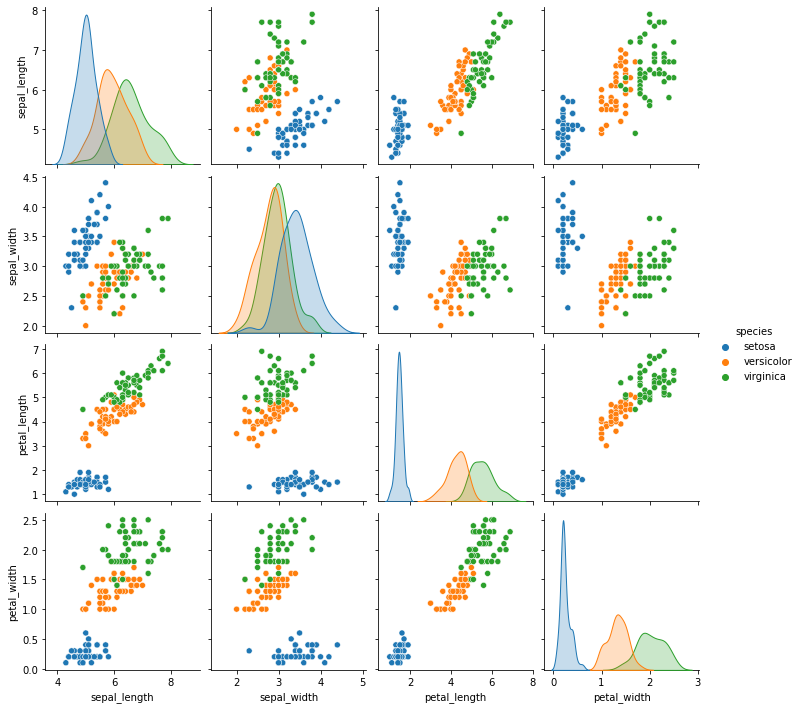

In [19]:
sns.pairplot(df, hue="species")